## Simulating first-order system step response

For a first-order system, the transfer function is given by

$ G(s) = Y(s)/U(s) = a/(s+p)$

where both $a$ and $s$ are constants. For a step input, $U(s) = 1/s$, we simulate the step response for different values of $p$.

In [3]:
# import all libraries
import control as ct 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# set plotting parameters
mpl.rcParams.update({
    "text.usetex": True,          # math TeX
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.linewidth": 1.2,
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "xtick.major.width": 1.2,
    "ytick.major.width": 1.2,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.minor.width": 1.0,
    "ytick.minor.width": 1.0,
    "legend.frameon": False,
})


Use the closed-form step response

In [4]:
a = 5.0
p_list = [5.0, 50.0]
colors = {5.0: "green", 50.0: "orange"}

t_end = 1.0
t = np.linspace(0, t_end, 200)

def step_resp(t, a, p):
    return (a / p) * (1.0 - np.exp(-p * t))
# compute step responses for different values of p
ys = {}
for p in p_list:
    ys[p] = step_resp(t, a, p)
y_inf = {}

# compute steady state values
for p in p_list:
    y_inf[p] = a / p

# get the normalized values by dividing by the steady state value
ys_norm = {}
for p in p_list:
    ys_norm[p] = ys[p] / y_inf[p]


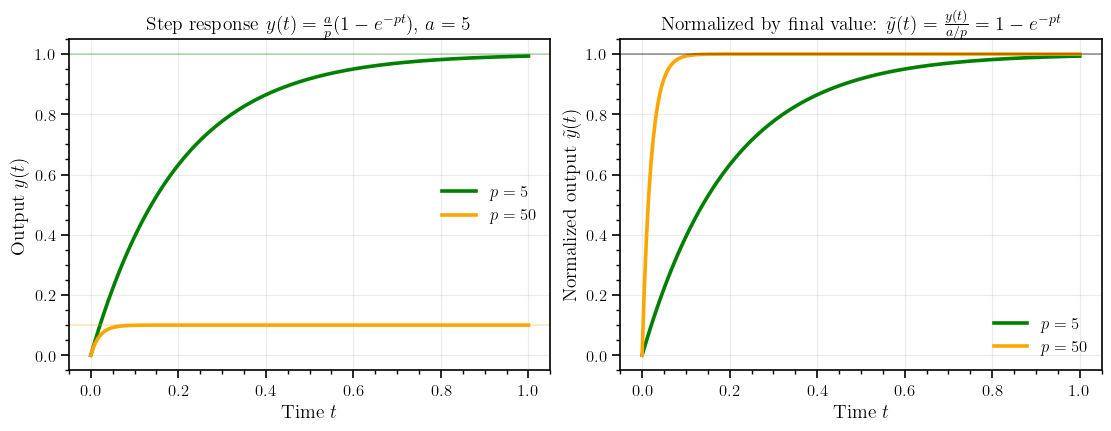

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4.2), constrained_layout=True)

# Left: raw responses
for p in p_list:
    ax[0].plot(t, ys[p], lw=2.6, color=colors[p], label=rf"$p={int(p)}$")
    ax[0].axhline(y_inf[p], lw=1.3, color=colors[p], alpha=0.25)

ax[0].set_title(r"Step response $y(t)=\frac{a}{p}(1-e^{-pt})$, $a=5$")
ax[0].set_xlabel(r"Time $t$")
ax[0].set_ylabel(r"Output $y(t)$")
ax[0].grid(True, alpha=0.25)
ax[0].legend(loc="best")

# Right: normalized (divide by final value a/p)
for p in p_list:
    ax[1].plot(t, ys_norm[p], lw=2.6, color=colors[p], label=rf"$p={int(p)}$")
ax[1].axhline(1.0, lw=1.2, color="black", alpha=0.4)

ax[1].set_title(r"Normalized by final value: $\tilde y(t)=\frac{y(t)}{a/p}=1-e^{-pt}$")
ax[1].set_xlabel(r"Time $t$")
ax[1].set_ylabel(r"Normalized output $\tilde y(t)$")
ax[1].grid(True, alpha=0.25)
ax[1].legend(loc="best")

# Nice tick styling
for axy in ax:
    axy.tick_params(direction="out", which="both", top=False, right=False)
    axy.minorticks_on()

plt.savefig("w4l1_step_response_sim.png", dpi=300)
plt.show()
